   Fold  KFold Accuracy  StratifiedKFold Accuracy
0     1        0.956140                  0.947368
1     2        0.982456                  0.921053
2     3        0.912281                  0.956140
3     4        0.973684                  0.964912
4     5        0.920354                  0.964602


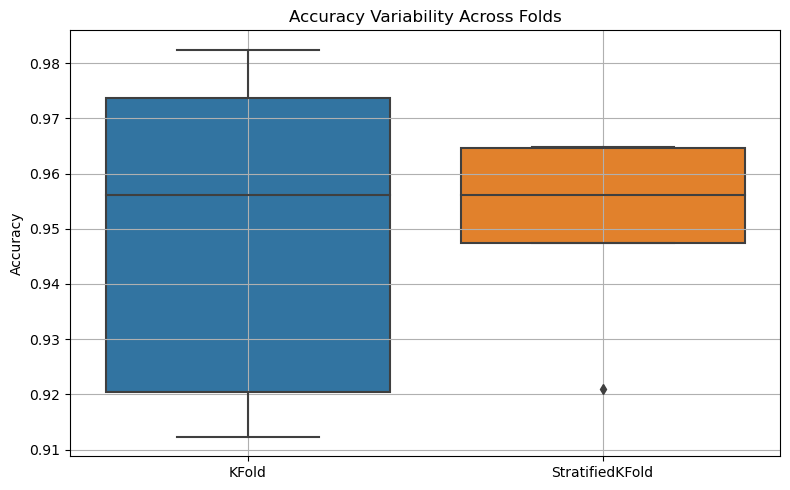

C:\Users\kisho\AppData\Local\Temp\ipykernel_24088\2327568692.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=class_dist_melted, x='Fold', y='Count', hue='Class', ci=None)


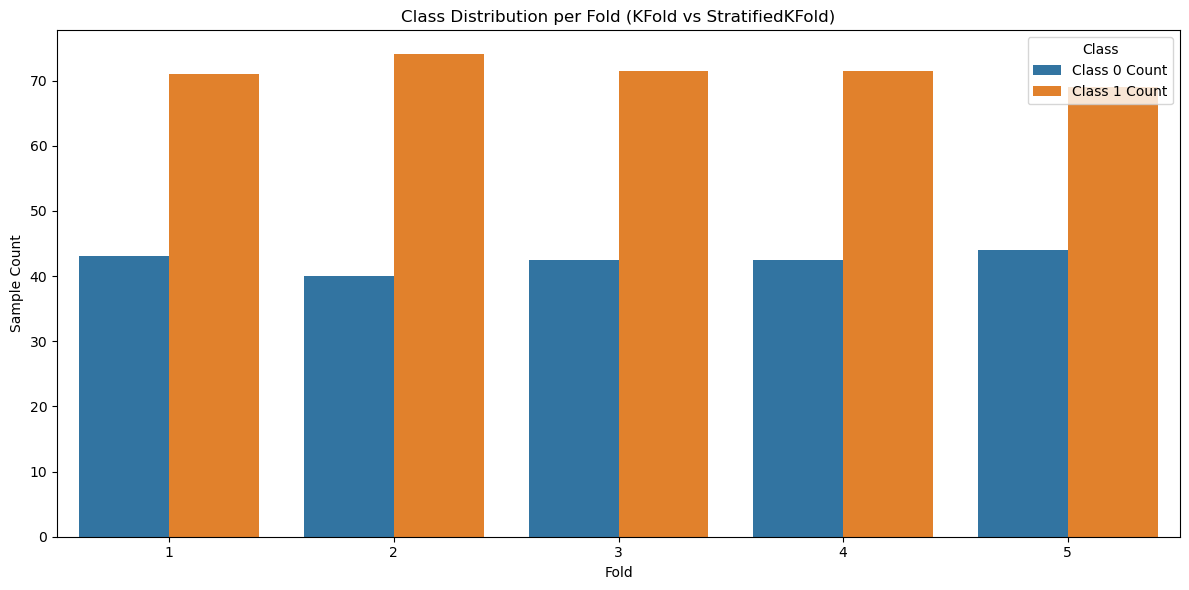

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Initialize a fast logistic regression model
model = LogisticRegression(solver='liblinear', max_iter=1000)

# ---------- K-Fold Cross-Validation ----------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_scores = []
kf_class_distributions = []

for train_idx, test_idx in kf.split(X):
    y_test = y[test_idx]
    kf_class_distributions.append(np.bincount(y_test, minlength=2))
    model.fit(X[train_idx], y[train_idx])
    preds = model.predict(X[test_idx])
    kf_scores.append(accuracy_score(y[test_idx], preds))

# ---------- Stratified K-Fold Cross-Validation ----------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_scores = []
skf_class_distributions = []

for train_idx, test_idx in skf.split(X, y):
    y_test = y[test_idx]
    skf_class_distributions.append(np.bincount(y_test, minlength=2))
    model.fit(X[train_idx], y[train_idx])
    preds = model.predict(X[test_idx])
    skf_scores.append(accuracy_score(y[test_idx], preds))

# ---------- Accuracy Results ----------
results_df = pd.DataFrame({
    'Fold': np.arange(1, 6),
    'KFold Accuracy': kf_scores,
    'StratifiedKFold Accuracy': skf_scores
})

print(results_df)

# ---------- Boxplot: Accuracy Variability ----------
plt.figure(figsize=(8, 5))
sns.boxplot(data=pd.DataFrame({
    'KFold': kf_scores,
    'StratifiedKFold': skf_scores
}))
plt.title('Accuracy Variability Across Folds')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- Class Distribution Plot ----------
class_dist_df = pd.DataFrame({
    'Fold': np.tile(np.arange(1, 6), 2),
    'Class 0 Count': [dist[0] for dist in kf_class_distributions + skf_class_distributions],
    'Class 1 Count': [dist[1] for dist in kf_class_distributions + skf_class_distributions],
    'Method': ['KFold']*5 + ['StratifiedKFold']*5
})

class_dist_melted = class_dist_df.melt(id_vars=['Fold', 'Method'], var_name='Class', value_name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(data=class_dist_melted, x='Fold', y='Count', hue='Class', ci=None)
plt.title('Class Distribution per Fold (KFold vs StratifiedKFold)')
plt.xlabel('Fold')
plt.ylabel('Sample Count')
plt.legend(title='Class')
plt.tight_layout()
plt.show()
